# Custom Seeds with the WaterShed Algorithm

## Step 1: Import The Libraries

In [71]:
# Import the Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### function to read magnified image

In [72]:
# function to read magnified image
def display_image(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

## Step 2:  Read The Image

In [73]:
# read the image
road = cv2.imread('E:/HP Laptop Drive/D Drive/OpenCV_Learning/opencv_self_codes/OpenCV_project/Temple_image.jpg')
road =cv2.resize(road,(600,600))

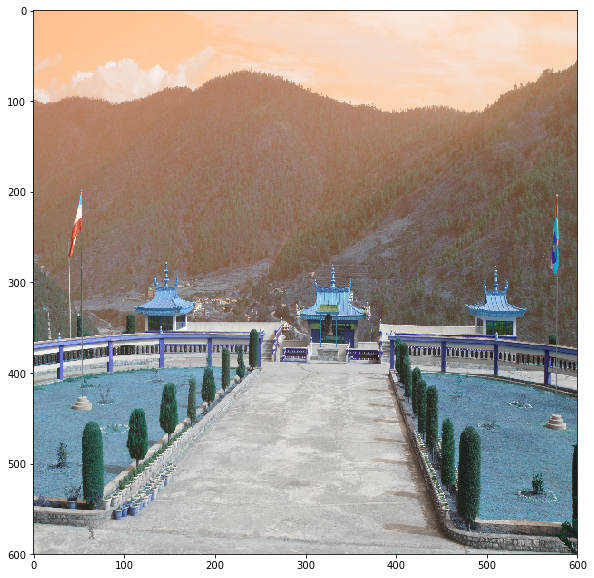

In [74]:
# make copy of image
road_copy = np.copy(road)
display_image(road)

## Step 3 : Create Markers & Segments

In [75]:
# create 2D black image marker
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [76]:
# create 3D black image segments
segments = np.zeros(road.shape,dtype = np.uint8)

## Creat Colors For Markers

use matplot lib for colos, Refer the link below
https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

1. Use colormaps (cm) 
2. we are going to use tab20 for our project
3. cm.tab20 will give us RGB color array with alpha parameter
4. we are using only 3 parameters then multiply them with 255 to get tuple of RGB values

In [77]:
from matplotlib import cm

In [78]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [79]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [80]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [81]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

## Step 4: Set Callback Function
1. Global Variable
2. Callback Function

In [82]:
# Global Variable
# Numbers 0-9
n_markers = 10

# Default settings for choice of color
current_marker = 1

# marker status updated by watershred algorithm
marks_updated = False

In [83]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


## Step 5: Display window using While loop

#### Inside while loop 
    I.  show two windows
                a. actual image window
                b. watershred algo window
    II.  closing window (to exit the window press 1)
    III. clear all the colors (press 'c' key) 
         (to avoid closing window everytime press one key to clear image)
    IV.  update color choice
    V.   update the marking

In [84]:
cv2.namedWindow('Temple Image')
cv2.setMouseCallback('Temple Image', mouse_callback)


while True:
    cv2.imshow('Watershred Segments',segments)
    cv2.imshow('Temple Image',road_copy)
    
    # clossing window esc press
    k = cv2.waitKey(1)
    if k == 27:
        break
        
    # clearing the window press 'e' key
    elif k== ord('c'):
            temple_copy = road.copy()
            marker_image = np.zeros(road.shape[:2],dtype=np.int32)
            segments = np.zeros(road.shape,dtype = np.uint8)
            
    # udate color choices
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    
    # For updating the markings in image
    
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
            
cv2.destroyAllWindows()    
    